Initialize

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
import sys

# import JUICE lib
sys.path.append('../lib/')

Load JUICE lib

In [13]:
import juice_spice_lib as juice_lib

Load SPICE kernels

In [14]:
# load SPICE ketnels
spice_dir = 'C:/share/Linux/doc/spice/juice/kernels/'
juice_lib.spice_ini(spice_dir)

JUICE orbit near Ganymede seen from Jupiter

In [15]:
# set date/time
utctim = '2035-03-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*60*24   # number of data
dt = 60            # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUICE', 'JUPITER')
x_g, y_g, z_g, r_g, lat_g, lon_g = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'GANYMEDE', 'JUPITER')


Text(0, 0.5, 'X distance from Ganymede [Rg]')

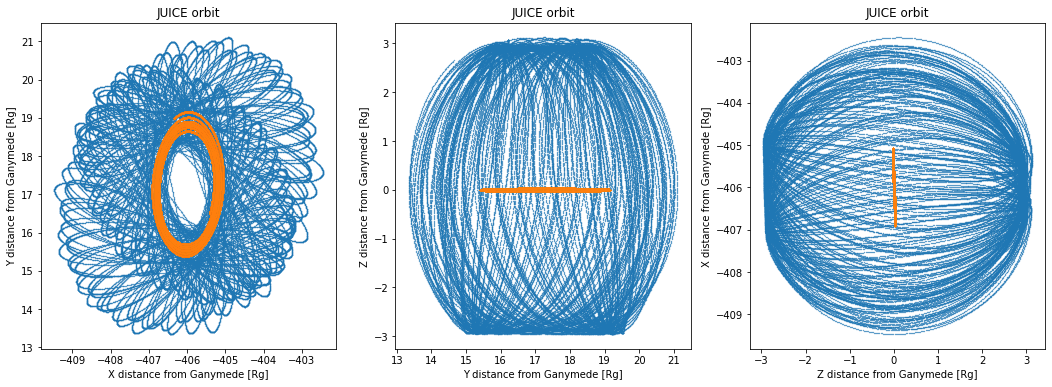

In [16]:
rg = 2634.1  # [km]

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(18.0, 6.0))#, sharex=True, sharey=True)

ax1.scatter(x/rg, y/rg, s=0.1)
ax1.scatter(x_g/rg, y_g/rg, s=0.1)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X distance from Ganymede [Rg]')
ax1.set_ylabel('Y distance from Ganymede [Rg]')

ax2.scatter(y/rg, z/rg, s=0.1)
ax2.scatter(y_g/rg, z_g/rg, s=0.1)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y distance from Ganymede [Rg]')
ax2.set_ylabel('Z distance from Ganymede [Rg]')

ax3.scatter(z/rg, x/rg, s=0.1)
ax3.scatter(z_g/rg, x_g/rg, s=0.1)
ax3.set_title('JUICE orbit')
ax3.set_xlabel('Z distance from Ganymede [Rg]')
ax3.set_ylabel('X distance from Ganymede [Rg]')


In [36]:
# set date/time
utctim = '2035-03-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*60*24   # number of data
dt = 60            # time step [second]
et = et_ex + dt * np.arange(0, nd)

#x_rj, y_rj, z_rj, r_rj, lat_rj, lon_rj = juice_lib.get_pos_ref(et, ref='IAU_JUPITER', tar='JUICE',
#                                                               org='JUPITER', tar_ref='GANYMEDE')
#x_rg, y_rg, z_rg, r_rg, lat_rg, lon_rg = juice_lib.get_pos_ref(et, ref='IAU_JUPITER', tar='GANYMEDE',
#                                                               org='JUPITER', tar_ref='GANYMEDE')
x_rj, y_rj, z_rj, r_rj, lat_rj, lon_rj = juice_lib.get_pos_ref(et, ref='IAU_GANYMEDE', tar='JUICE',
                                                               org='JUPITER', tar_ref='GANYMEDE')
x_rg, y_rg, z_rg, r_rg, lat_rg, lon_rg = juice_lib.get_pos_ref(et, ref='IAU_GANYMEDE', tar='GANYMEDE',
                                                               org='JUPITER', tar_ref='GANYMEDE')

Text(0, 0.5, 'X distance from Ganymede [Rg]')

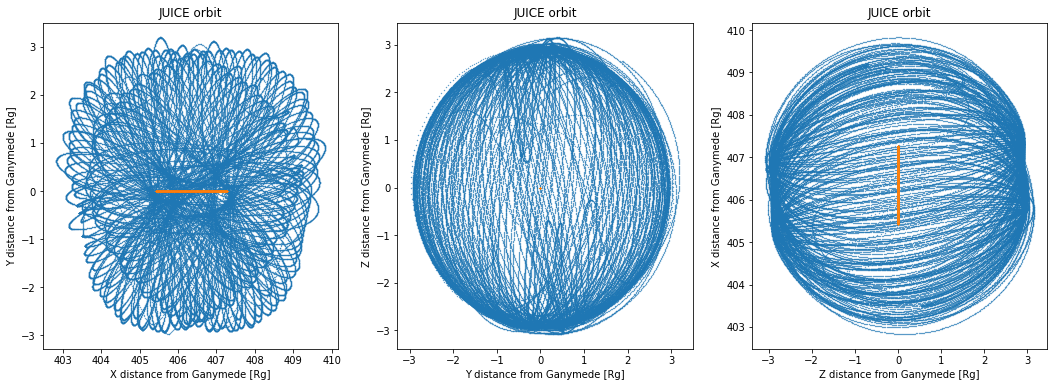

In [37]:
rg = 2634.1  # [km]

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(18.0, 6.0))  # , sharex=True, sharey=True)

ax1.scatter(x_rj/rg, y_rj/rg, s=0.1)
ax1.scatter(x_rg/rg, y_rg/rg, s=0.1)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X distance from Ganymede [Rg]')
ax1.set_ylabel('Y distance from Ganymede [Rg]')

ax2.scatter(y_rj/rg, z_rj/rg, s=0.1)
ax2.scatter(y_rg/rg, z_rg/rg, s=0.1)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y distance from Ganymede [Rg]')
ax2.set_ylabel('Z distance from Ganymede [Rg]')

ax3.scatter(z_rj/rg, x_rj/rg, s=0.1)
ax3.scatter(z_rg/rg, x_rg/rg, s=0.1)
ax3.set_title('JUICE orbit')
ax3.set_xlabel('Z distance from Ganymede [Rg]')
ax3.set_ylabel('X distance from Ganymede [Rg]')


In [19]:
# set date/time
utctim = '2035-03-01T00:00:00'    # start date/time
et = [spice.str2et(utctim)]      # seconds

# calculate JUICE position seen from Ganymede
xs, ys, zs, rs, lats, lons = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUICE', 'GANYMEDE')

# calculate Jupiter position seen from Ganymede
xj, yj, zj, rj, latj, lonj = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUPITER', 'GANYMEDE')

Find limb points on Ganumede seen from JUICE.

See 
https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/limbpt_c.html

In [22]:
# VARIABLE  I/O  DESCRIPTION
# -------- --- --------------------------------------------------
# method     I   Computation method.
# target     I   Name of target body.
# et         I   Epoch in ephemeris seconds past J2000 TDB.
# fixref     I   Body-fixed, body-centered target body frame.
# abcorr     I   Aberration correction.
# corloc     I   Aberration correction locus.
# obsrvr     I   Name of observing body.
# refvec     I   Reference vector for cutting half-planes.
# rolstp     I   Roll angular step for cutting half-planes.
# ncuts      I   Number of cutting half-planes.
# schstp     I   Angular step size for searching.
# soltol     I   Solution convergence tolerance.
# maxn       I   Maximum number of entries in output arrays.
# npts       O   Counts of limb points corresponding to cuts.
# points     O   Limb points.
# epochs     O   Times associated with limb points.
# tangts     O   Tangent vectors emanating from the observer.spice.limbpt("TANGENT/ELLIPSOID", )

utctim = '2035-03-01T00:00:00'    # start date/time
et = spice.str2et(utctim)         # seconds

method = 'TANGENT/ELLIPSOID'
target = 'GANYMEDE'
fixref = 'IAU_GANYMEDE'
abcorr = 'CN+S'
corloc = 'CENTER'
obsrvr = 'JUICE'
ncuts = 100
refvec = [0.0, 0.0, 1.0]
rolstp = 2.0 * np.pi / ncuts
schstp = 0.0  # not used for TANGENT/ELLIPSOID
soltol = 0.0  # not used for TANGENT/ELLIPSOID
maxn = 10000

npts, points, trgeps, tangts = spice.limbpt(
    method, target, et, fixref, abcorr, corloc, obsrvr, refvec, rolstp, ncuts,  schstp, soltol, maxn)


Plot the limb points

Text(0, 0.5, 'X [km]')

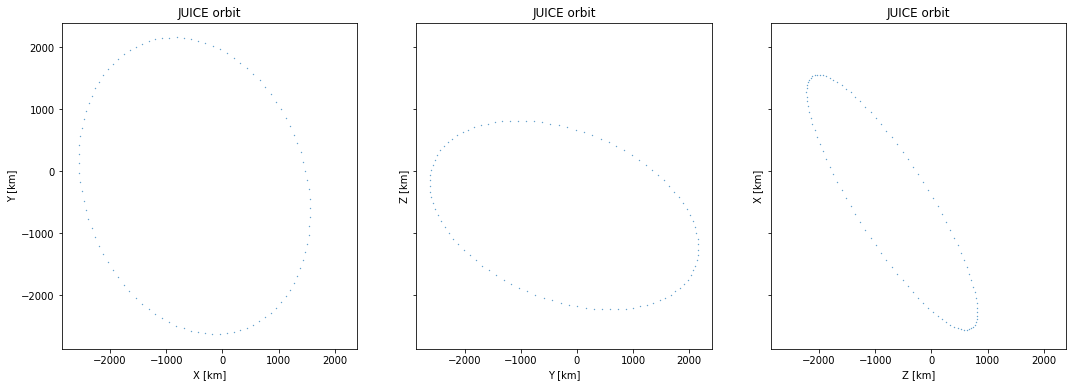

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(18.0, 6.0), sharex=True, sharey=True)

ax1.scatter(points[:, 0], points[:, 1], s=0.1)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X [km]')
ax1.set_ylabel('Y [km]')

ax2.scatter(points[:,1], points[:,2], s=0.1)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y [km]')
ax2.set_ylabel('Z [km]')

ax3.scatter(points[:,2], points[:,0], s=0.1)
ax3.set_title('JUICE orbit')
ax3.set_xlabel('Z [km]')
ax3.set_ylabel('X [km]')

Find limb points on Ganumede seen from Jupiter

In [34]:
utctim = '2035-03-01T00:00:00'    # start date/time
et = spice.str2et(utctim)         # seconds

# Find limb points on Ganumede seen from Jupiter
method = 'TANGENT/ELLIPSOID'
target = 'GANYMEDE'
fixref = 'IAU_GANYMEDE'
abcorr = 'CN+S'
corloc = 'CENTER'
obsrvr = 'JUPITER'
ncuts = 100
refvec = [0.0, 0.0, 1.0]
rolstp = 2.0 * np.pi / ncuts
schstp = 0.0  # not used for TANGENT/ELLIPSOID
soltol = 0.0  # not used for TANGENT/ELLIPSOID
maxn = 10000

npts, points, trgeps, tangts = spice.limbpt(
    method, target, et, fixref, abcorr, corloc, obsrvr, refvec, rolstp, ncuts,  schstp, soltol, maxn)

# Find JUICE position seen from Jupiter
xs, ys, zs, rs, lats, lons = juice_lib.get_pos(
    [et], 'IAU_GANYMEDE', 'JUICE', 'JUPITER')

Text(0, 0.5, 'X [km]')

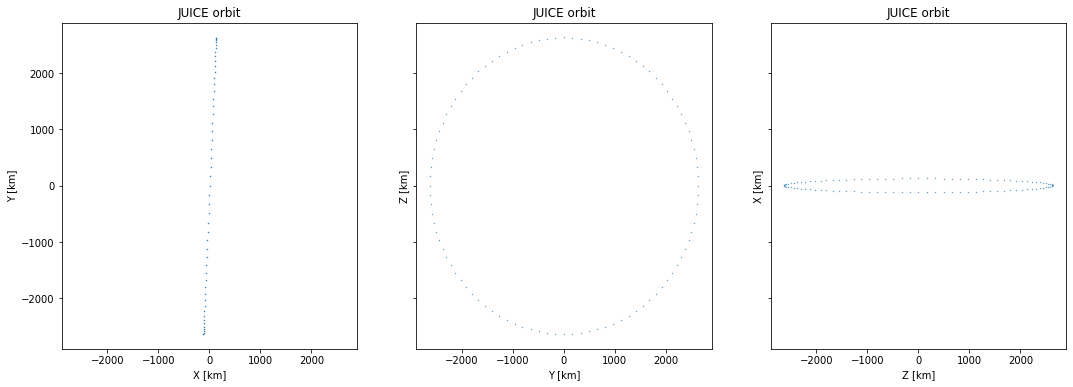

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(18.0, 6.0)) #, sharex=True, sharey=True)

ax1.scatter(points[:, 0], points[:, 1], s=0.1)
#ax1.scatter(xs, ys, s=10)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X [km]')
ax1.set_ylabel('Y [km]')

ax2.scatter(points[:, 1], points[:, 2], s=0.1)
#ax2.scatter(ys, zs, s=10)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y [km]')
ax2.set_ylabel('Z [km]')

ax3.scatter(points[:, 2], points[:, 0], s=0.1)
#ax3.scatter(zs, xs, s=10)
ax3.set_title('JUICE orbit')
ax3.set_xlabel('Z [km]')
ax3.set_ylabel('X [km]')